In [188]:
import pandas as pd
from plotnine import *
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [111]:
df = pd.read_csv('Titanic_Dataset/train.csv')
df1 = pd.read_csv('Titanic_Dataset/test.csv') 

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understanding dataset
- In this dataset, there is 891 rows and 12 columns.
- The first column "PassengerId" have id from 1 to 891.
- The second column is "Survived" that represent the passengers are survived or not (died or live).
- The third column "Pclass" have 3 unique value (1, 2, 3) which categories the family background(socio-economic status) It is categorized into three classes: 1 = Upper, 2 = Middle, 3 = Lower.
- The fourth column is "Name" that have 17 different initial ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Rev', 'Col', 'Mlle', 'Major',
 'Lady', 'Sir', 'Mme', 'Capt', 'the Countess', 'Jonkheer', 'Don', 'Ms']
 1. Mr -> Adult male(18+)
 2. Mrs -> Adult female(18+) (Married woman)
 3. Miss -> Young adult female(teen–30s) (Unmarried woman)
 4. Master -> Child male(<13) Boy(often traveling with family)
 5. Dr -> Both(f or m), Adult(30+) Doctor(medical or academic)
 6. Rev -> Adult male(30+) (Reverend, church clergy)
 7. Col -> Adult male(30+) (Colonel, military rank)
 8. Major -> Adult male(40+) (Military officer)
 9. Mlle -> Young adult female (Mademoiselle (French Miss))
 10. Mme -> Adult female (Madame (French Mrs))
 11. Ms -> Adult female (Modern Miss/Mrs)
 12. Lady -> Adult female(40+) (Noblewoman / aristocracy)
 13. Sir -> Adult male(40+) (Knighted man / aristocracy)
 14. the Countess -> Adult female(40+) (Countess (nobility))
 15. Capt -> Adult male(40+) (Captain (ship or military))
 16. Don -> Adult male(40+)	 (Spanish honorific)
 17. Jonkheer -> Young adult male(20s–30s) (Dutch nobleman)

- The fifth column is "Sex" whcih have two unique value male or female.
- The sixth column is "Age" which have age of all passenger, the minimum age is 0.42 and maximum age is 80.
- The seventh column is "SibSp" SibSp stands for "Siblings/Spouses Aboard". It tells you how many siblings or spouses a passenger had on the Titanic.
- The eight column is "Parch" Parch stands for "Parents/Children Aboard". It tells you how many parents or children a passenger had on the Titanic.
- The ninth column is "Ticket" The ticket number assigned to the passenger.
- The tenth column is "Fare" column represents the amount of money (in British Pounds) that a passenger paid for their ticket.
- The eleventh column is "Cabin" Cabin column represents the cabin number where a passenger stayed on the ship.
- The Last column is "Embarked" The port of embarkation for the passenger. It can take one of three values: C = Cherbourg, Q = Queenstown, S = Southampton.

## Data Exploration and Observation

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation: In this 12 columns, 2 columns have float values, 5 columns have int values and 5 columns have object values

In [39]:
df[["Age","Fare"]].mean()

Age     29.699118
Fare    32.204208
dtype: float64

#### Observation 
- Average age of passengers is approximately 29.7 years, indicating that most passengers were relatively young.
- Age distribution is fairly symmetric, as the mean (29.7) and median (28.0) are close.
- There are missing values in the Age column (714 entries vs. 891 for Fare), suggesting some age data is not available.

- For Fare, the mean is 32.20 and the median is 14.45 — a large gap indicating a right-skewed (positively skewed) distribution.
- The high standard deviation (49.69) also supports the presence of large variability in fare prices.

In [40]:
df.value_counts("Survived")

Survived
0    549
1    342
Name: count, dtype: int64

#### Observation
In total population: only 342 passengers are survived and remaining 549 passangers cannot survived (that means died).

In [41]:
df.value_counts("Sex")

Sex
male      577
female    314
Name: count, dtype: int64

#### Observation
In total population, 577 passengers are male and remaining 314 passengers are female

In [42]:
df.value_counts(["Sex", "Survived"])

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

#### Observation
- Interestingly, 109 male passengers are survived and 468 male passengers not survived out of 577 male passengers.
- Simillarly, 233 female passengers are survived and only 81 female passangers are not survived out of 314 female passengers.

#### Conclusion
- Death rate of male population is double the survival rate of female counterparts.

In [43]:
df.value_counts("Embarked")

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

#### Observation
- 644 passengers are started travel from Southampton(S), 168 from Cherbourg(C) and 77 started travel from Queenstown(Q).

#### Conclusion
- Most of the passengers are from Southampton, nearly 73% passengers started from Southampton. Only nearly 8% passengers are from Queenstown.

In [44]:
df[df['Embarked'] == "S"].value_counts("Sex")

Sex
male      441
female    203
Name: count, dtype: int64

#### Observation
- 441 passengers are male 203 passengers are female which started jorney form Southampton. 

## Data Filteration and Observation

In [45]:
fare_low = df[df['Fare'] == 0].value_counts().sum()
fare_low

2

#### Observation
- 2 Passengers with fare = 0.0 likely traveled without paying or had free tickets.
- This could be because they were crew members, children traveling free, or special guests.

In [46]:
fare_high = df[df['Fare'] >=500].value_counts().sum()
fare_high

2

### Observation
- 2 Passengers with fare greather or equal to 500, A fare of >=512 pounds is extremely high and indicates a luxury ticket—likely a first-class, premium or suite cabin.
- Titanic’s richest passengers paid top prices for the best accommodations.

### Conclusion
- High fares usually correlate with higher survival chances due to better access to lifeboats and other security equiments.

In [47]:
df[df['Pclass']==1].shape[0] # Total 216 passengers from High socio-economic background

216

In [48]:
survival_of_class1 = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].shape[0]
survival_of_class1

136

In [49]:
total = (136/216)*100
total_rounded = round(total, 2)
total_rounded

62.96

#### Observation
- Approximately 63% of passengers from high class background are survived.

In [50]:
df[df['Pclass']==2].shape[0] # Total 184 passengers from intermediate socio-economic background

184

In [51]:
survival_of_class2 = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].shape[0]
survival_of_class2

87

In [52]:
total1 = (87/184)*100
total_rounded1 = round(total1, 2)
total_rounded1

47.28

#### Observation
- Approximately 47% of passengers from intermediate class background are survived.

In [53]:
df[df['Pclass']==3].shape[0] # Total 491 passengers from intermediate socio-economic background

491

In [54]:
survival_of_class3 = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0]
survival_of_class3

119

In [55]:
total2 = (119/491)*100
total_rounded2 = round(total2, 2)
total_rounded2

24.24

#### Observation
- Approximately 24% of passengers from low class background are survived.

#### Conclusion
- According to this above three observation, most of the passengers are survived from high socio-economic background (Pclass = 1)
- This indicates that passengers in first class had a significantly better chance of survival compared to those in lower classes.
- Passengers in second class had a moderate survival rate, which was higher than third class but lower than first class.
- The lowest survival rates were observed among third class passengers, suggesting that socio-economic status played a major role in survival chances.
- The data suggests a clear correlation between passenger class and survival, reflecting the social inequalities aboard the Titanic.

## Finding and Handling missing value

In [56]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Observation
- 177 data of passengers in Age column are missing, 687 data from Cabin column and only 2 data from Embarked column have missing value.
- We cannot remove(dropout) missing row from dataset because there will may lost some important information.
- But, we can remove 2 missing data row from Embarked because that cannot more fracuated(affected) to our result.

In [57]:
df = df.dropna(subset = ["Embarked"])

### 1. Handling missing value in Age column

Filling missing value in age column by mean age of different initializer in name column

In [133]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [134]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

## Observation
- There would 17 different intials in the name of passengers.
- In our dataset, there would be passengers age from 0.42 year to 80 year, so it will not more accurate average result for the null value.
- So, we are going to seperate initals from name the according to this initials then we calculate the average age and filling appropriately.

In [60]:
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Royalty',
    'the Countess': 'Royalty',
    'Dona': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Jonkheer': 'Royalty',
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer'
})

In [61]:
df['Title'].value_counts()

Title
Mr         517
Miss       184
Mrs        125
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64

In [135]:
df['Age'] = df['Age'].fillna(df.groupby("Title")['Age'].transform('mean'))

In [136]:
df['Age'].isna().sum()

0

#### Observation
Instead of using a global mean, you use a group-specific mean, which improves accuracy, especially when Age is an important feature

### 2. Handling missing value in Cabin column

- Condition 1: NaN in Cabin usually means the cabin number wasn’t recorded — which we can reasonably treat as no reserved cabin.
- Condition 2: Non-null Cabin means a passenger had a recorded cabin — which we can treat as cabin reserved.

In [64]:
df['Cabin'] = df['Cabin'].notna().map({True: 'Yes', False: 'No'})

## Visualization and Observation

### From Bar Graph

In [65]:
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

<Axes: title={'center': 'Count of Survived Passengers'}, xlabel='Survived (0=No, 1=Yes)', ylabel='No. of Passengers'>

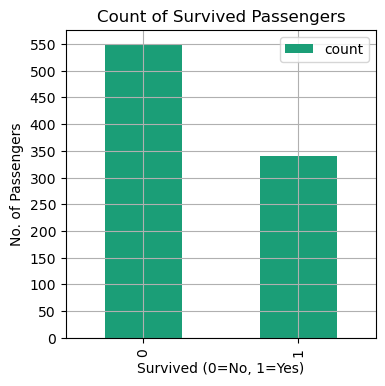

In [66]:
df['Survived'].value_counts().plot(
    kind = "bar",
    title = "Count of Survived Passengers",
    figsize = (4,4),
    legend = True,
    yticks = list(range(0,600, 50)),
    xlabel = "Survived (0=No, 1=Yes)",
    ylabel = "No. of Passengers",
    grid = True,
    colormap = "Dark2"
)

#### Observation
- This graph is a count plot showing the number of passengers who survived vs. those who did not survive in the Titanic dataset.
- 0 (No) has a taller bar (around ~550 passengers) → More people did not survive.
- 1 (Yes) has a shorter bar (around ~340 passengers) → Fewer people survived.
- The majority of passengers on the Titanic did not survive, with around 550 fatalities compared to about 340 survivors.
- Survival was less likely overall, as roughly 38% of passengers survived while 62% did not.

In [67]:
group_by_gender = df[['Sex', 'Survived']].groupby(by="Sex")

In [68]:
group_by_gender.value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: title={'center': 'Count of Survived Passengers'}, xlabel='Survived (0=No, 1=Yes)', ylabel='No. of Passengers'>

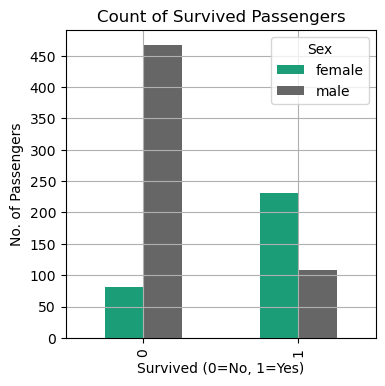

In [69]:
pd.crosstab(df.Survived, df.Sex).plot(
    kind = "bar",
    title = "Count of Survived Passengers",
    figsize = (4,4),
    legend = True,
    yticks = list(range(0,500, 50)),
    xlabel = "Survived (0=No, 1=Yes)",
    ylabel = "No. of Passengers",
    grid = True,
    colormap = "Dark2"
)

#### Observation
- Male passengers had a much higher death count than survival count — most men did not survive.
- Female passengers show the opposite trend — most women survived, with far fewer fatalities.
- This pattern suggests that women had a significantly higher survival rate, likely due to the “women and children first” evacuation practice.

C:\Users\Swastikpc\AppData\Local\Temp\ipykernel_1540\1117731465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Class 1: 62.62% survived
Class 2: 47.28% survived
Class 3: 24.24% survived


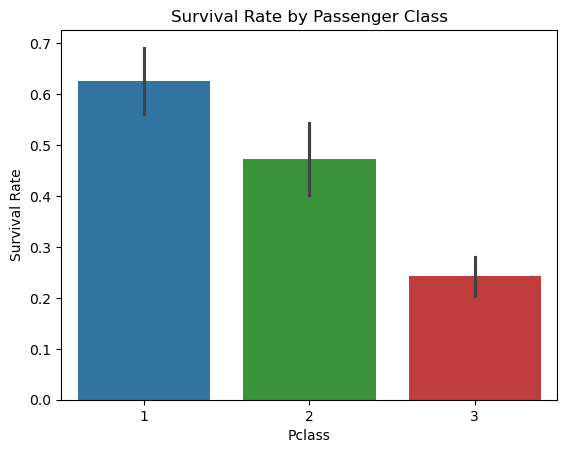

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of survival by Pclass with different colors
sns.barplot(
    x="Pclass", 
    y="Survived", 
    data=df,
    palette=["#1f77b4", "#2ca02c", "#d62728"]  # Blue, Green, Red
)

# Calculate and print survival percentages by class
survival_by_class = df.groupby("Pclass")["Survived"].mean() * 100
for pclass, percentage in survival_by_class.items():
    print(f"Class {pclass}: {percentage:.2f}% survived")

plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


#### Observation
- As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

#### Conclusion
- Higher-class passengers on the Titanic had a significantly greater chance of survival, indicating that passenger class strongly influenced access to safety during the disaster.

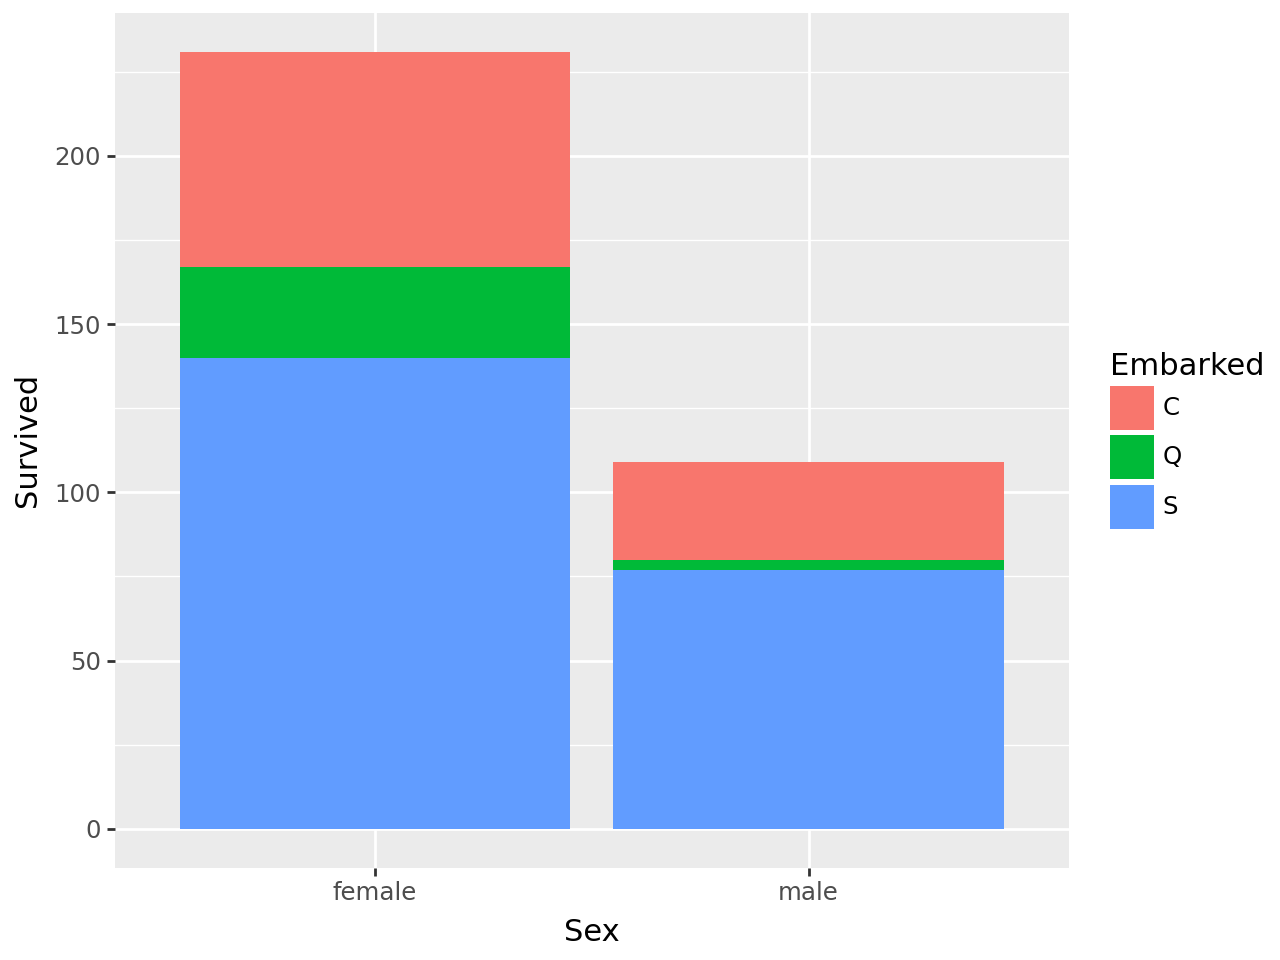

In [82]:
(ggplot(df)
 + aes(x='Sex', y='Survived', fill='Embarked')
 + geom_col()
)

#### Observation
- This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

In [94]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df['Pclass'] = df['Pclass'].astype('str')

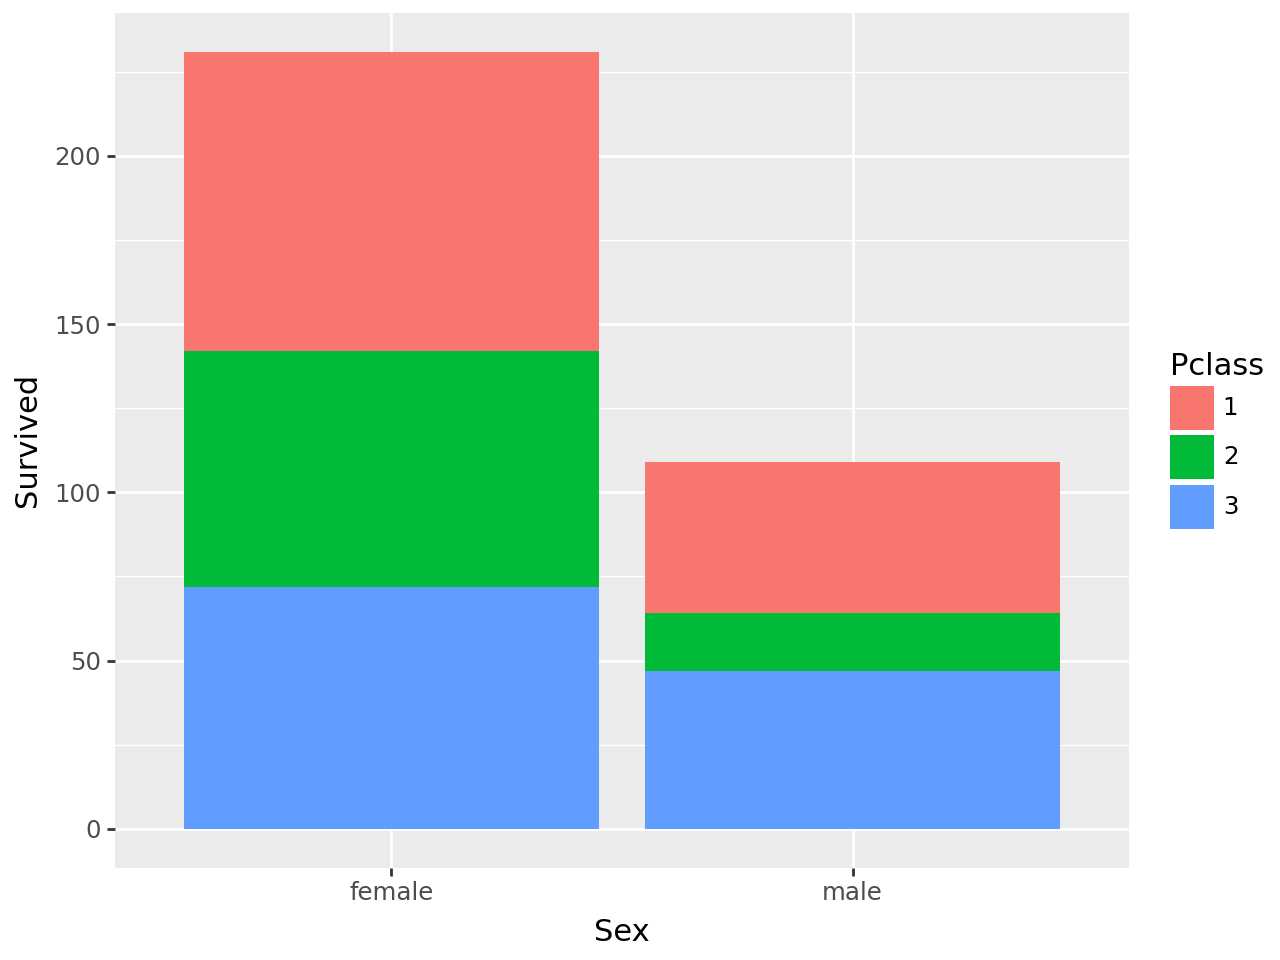

In [109]:
(ggplot(df)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

#### Observation
People say Money Can't Buy Everything. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.
For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

#### Conclusion
- Looking at  the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

- It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.


## Drop non-numeric columns that are not useful for the model

In [143]:
df_processed = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title'], axis=1)

In [159]:
df_processed['Embarked_S'] = df_processed['Embarked_S'].astype("int")


## Convert categorical columns to numerical using one-hot encoding

In [145]:
df_processed = pd.get_dummies(df_processed, columns=['Sex', 'Embarked'], drop_first=True)

## Train Model and Check Accuracy

In [166]:
X = df_processed.drop('Survived', axis=1)
Y = df_processed['Survived']

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [195]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)

C:\Users\Swastikpc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=200)

In [175]:
Y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
acc_logreg

80.06

### 2. Support Vector Machine

In [176]:
svc = SVC()
svc.fit(X_train, Y_train)


SVC()

In [177]:
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

67.42

### 3. KNN

In [180]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [181]:
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.01

### 4. Decision Tree

In [186]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [187]:
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.03

### 5. Random Forest

In [190]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [191]:
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.03

In [196]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'SVM',
              'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_logreg, acc_svc,
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.03
4,Decision Tree,98.03
0,KNN,83.01
1,Logistic Regression,80.06
2,SVM,67.42
